In [ ]:
!pip install scikit-plot

In [ ]:
!pip install --upgrade git+https://github.com/tusharsarkar3/XBNet.git

In [ ]:
#Importing required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_auc_score,recall_score,precision_score,f1_score
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
import graphviz
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import RFECV

from imblearn.pipeline import Pipeline as Pipeline_IM
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import scikitplot as skplt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import os
import tempfile

import torch
from XBNet.training_utils import training,predict
from XBNet.models import XBNETClassifier
from XBNet.run import run_XBNET 

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

warnings.filterwarnings('ignore')
%matplotlib inline

# Exploratory Data Analysis and Data Cleaning

In [ ]:
#Loading Data as Pandas DataFrame
credit_df = pd.read_csv('creditcard.csv')

Data Source: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [ ]:
credit_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28



*   Datatypes of all the columns are verified to be in the expected format.
*   There is No Missing Data or Null Values for any of the Columns.



In [ ]:
credit_df =credit_df[~credit_df.duplicated(keep='first')]

* There were a lot of duplicate rows in the Data that were removed, retaining the first record. A total of 1081 columns were dropped.

In [ ]:
credit_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0



* The Features are all either Continuous or Ordinal and the Response variable is Binary. There is no need for Label Encoding any of the Features.
* The data has 30 features, out of which the 28 feature are the principal components.

## Descriptive Statistics

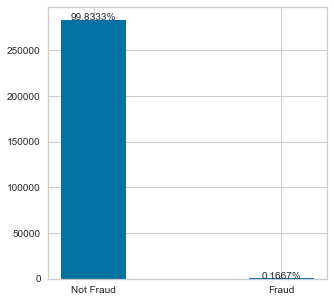

Percent of Non-Fraudulent Transactions = 99.833%
Percent of Fraudulent Transactions = 0.167%


In [ ]:
width = 0.35
fig, ax = plt.subplots(figsize=(5, 5))
pps = ax.bar(['Not Fraud','Fraud'], 
             credit_df['Class'].value_counts().values, 
             width, 
             align='center')

for p in pps:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}%".format(round((height/credit_df.shape[0])*100,4)),
      ha='center')

plt.show()

nf_perct = round(credit_df["Class"].value_counts()[0]/len(credit_df) * 100,3)
f_perct = round(credit_df["Class"].value_counts()[1]/len(credit_df) * 100,3)
print(f'Percent of Non-Fraudulent Transactions = {nf_perct}%')
print(f'Percent of Fraudulent Transactions = {f_perct}%')

In [ ]:
# Checking Descriptive Statistics for PCA derived Masked Continious Fields
columns_cont = [col for col in credit_df.columns if col not in ['Time',
                                                                'Class',
                                                                'Amount']]
credit_df[columns_cont].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,...,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547
std,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,...,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084
25%,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,...,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818
50%,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,...,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288
75%,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,...,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808


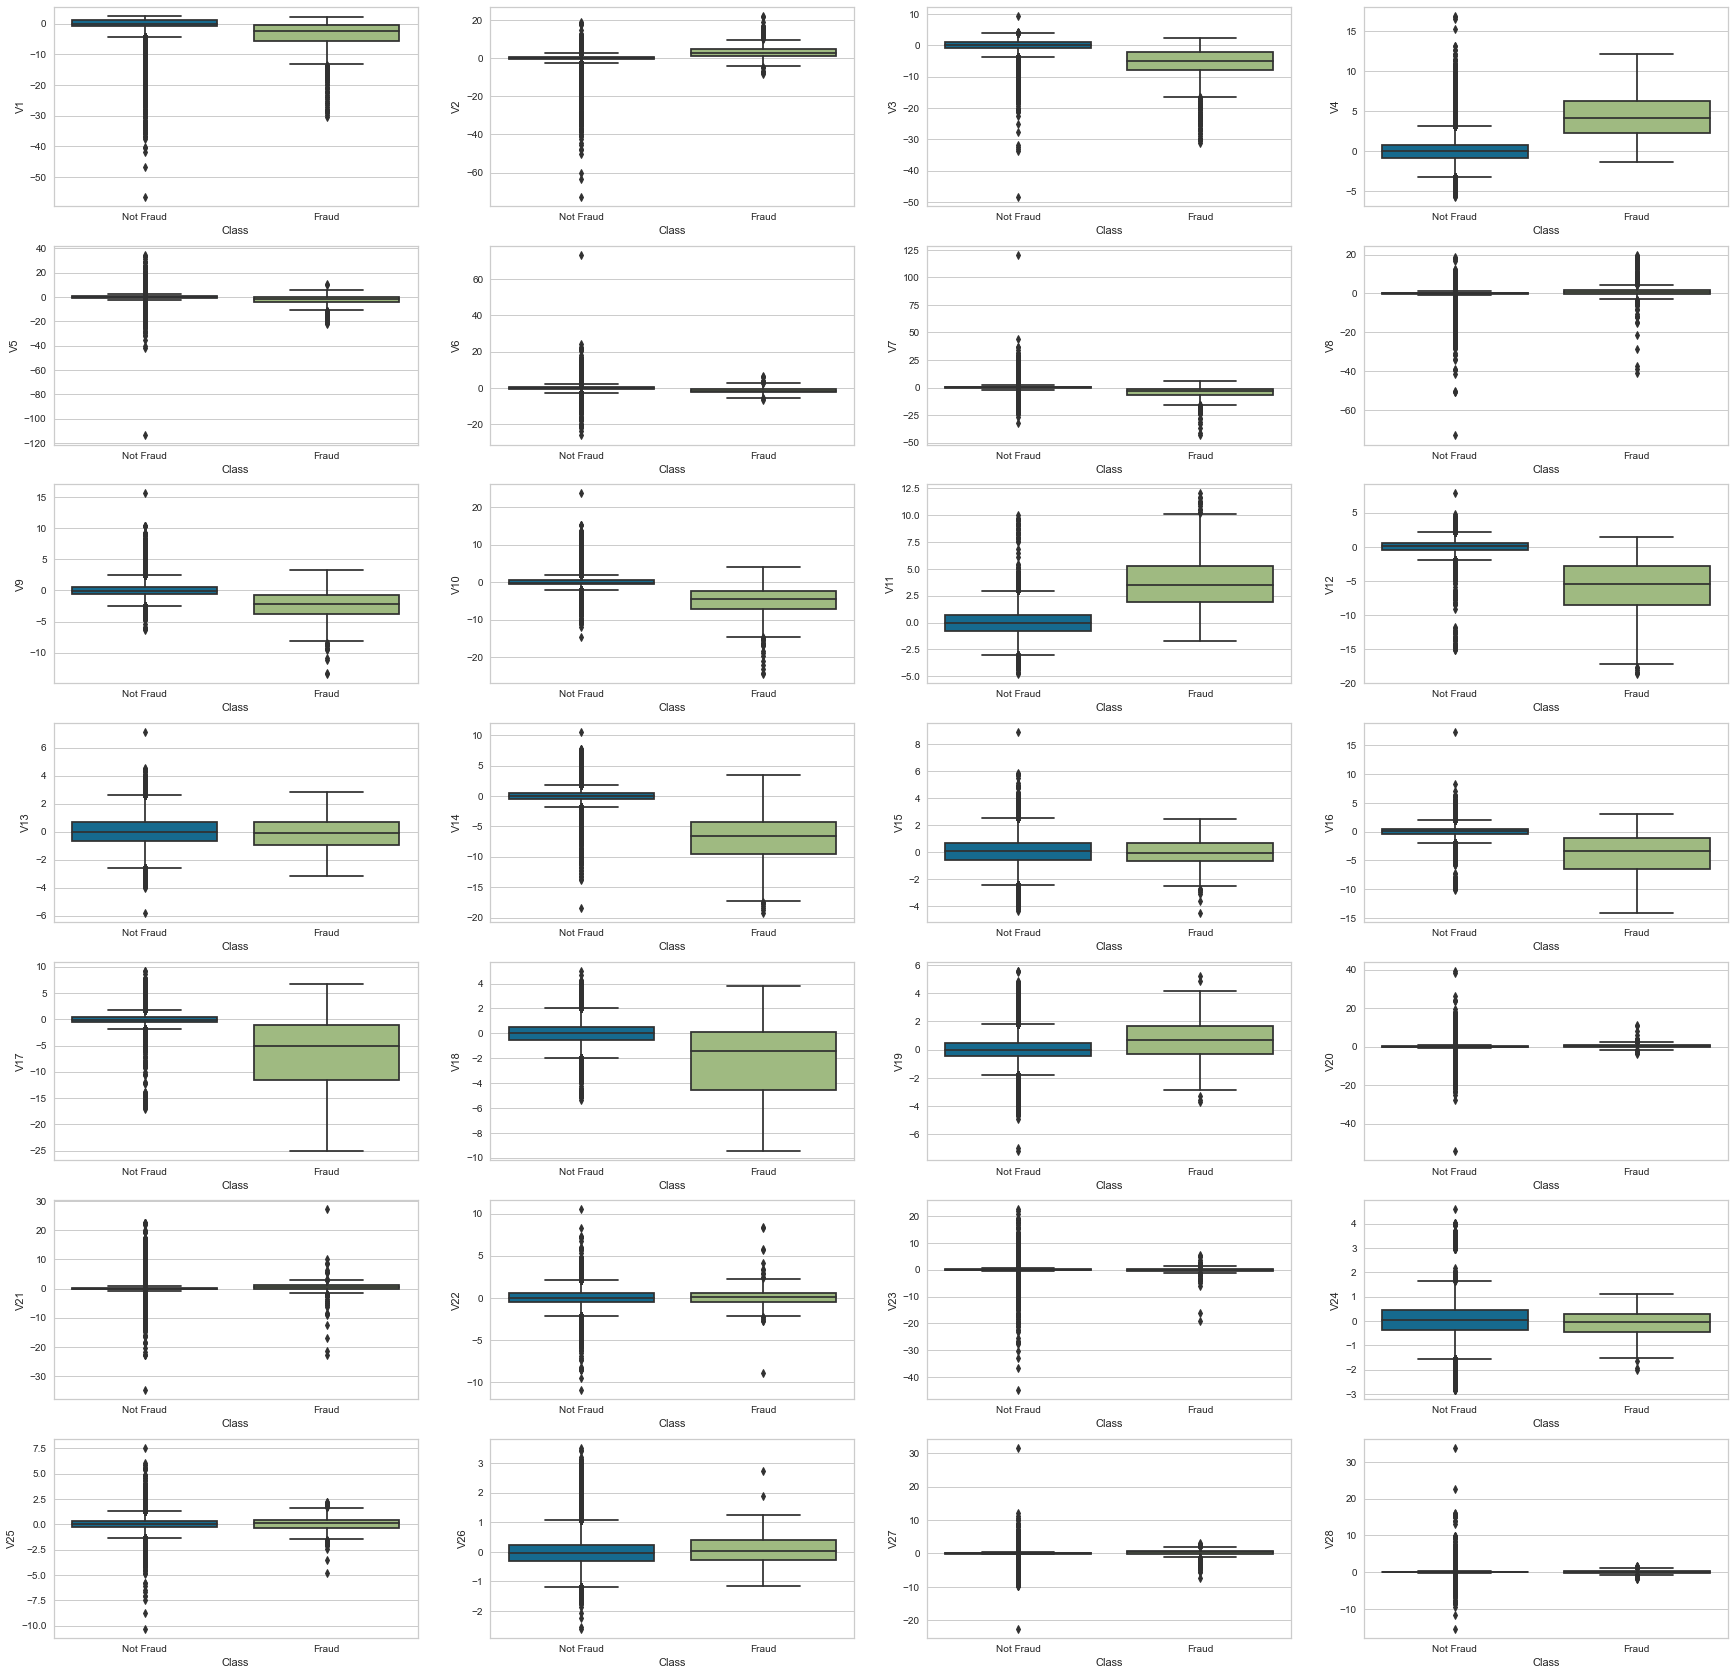

In [ ]:
fig, axes = plt.subplots(nrows=7, ncols=4,figsize=(30, 30))

i = 0
j = 0
for col in columns_cont:
    sns.boxplot(y=col, x= "Class", data=credit_df, orient='v', ax=axes[i][j])
    axes[i][j].set_xticklabels(["Not Fraud", "Fraud"])
    if(j == 3 and i <= 6):
      i += 1
      j = 0
    else:
      j += 1

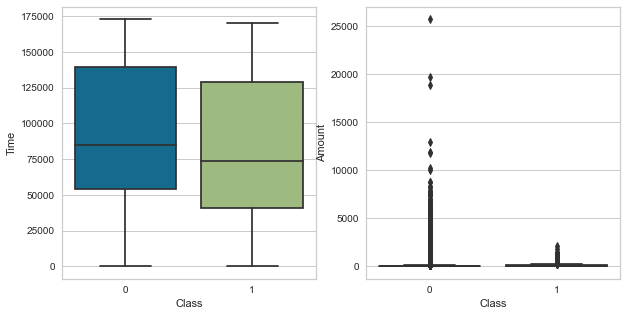

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))
i = 0
for col in ['Time','Amount']:
    sns.boxplot(y=col, x= "Class", data=credit_df, orient='v', ax=axes[i])
    i+=1

In [ ]:
credit_df[['Time','Amount']].describe()

,Time,Amount
count,283726.000000,283726.000000
mean,94811.077600,88.472687
std,47481.047891,250.399437
min,0.000000,0.000000
25%,54204.750000,5.600000
50%,84692.500000,22.000000
75%,139298.000000,77.510000
max,172792.000000,25691.160000


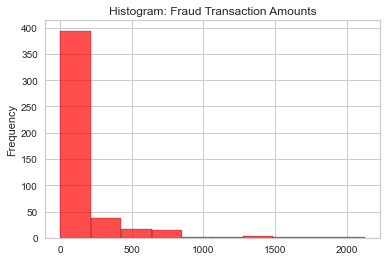

In [ ]:
credit_df[(credit_df['Class'] == 1)]['Amount'].plot(kind='hist',
                                                    edgecolor="black",
                                                    color='red',alpha=0.7)
plt.title('Histogram: Fraud Transaction Amounts');

In [ ]:
credit_df[(credit_df['Class'] == 1)]['Amount'].value_counts().head(10)

1.00     105
99.99     27
0.00      25
0.76      17
0.77      10
0.01       5
2.00       4
3.79       4
1.18       3
12.31      3
Name: Amount, dtype: int64

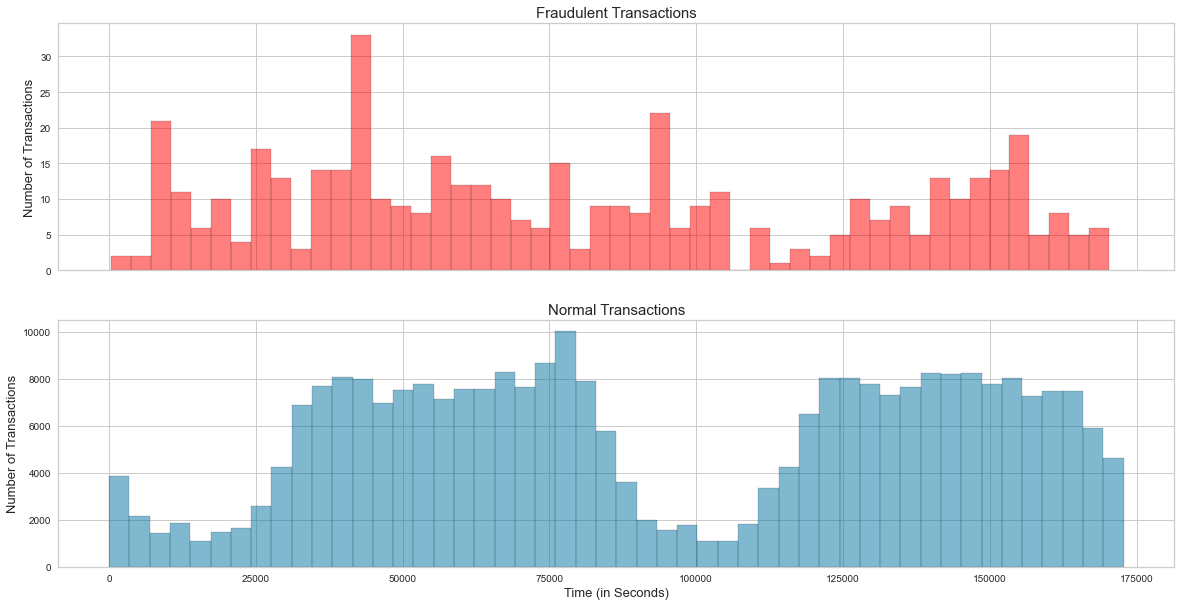

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20,10))

fraud_transactions = credit_df.Time[credit_df.Class == 1]
normal_transactions = credit_df.Time[credit_df.Class == 0]

ax1.hist(fraud_transactions, bins = 50, edgecolor="black",color='red',alpha=0.5)

ax1.set_title('Fraudulent Transactions', fontsize=15)
ax1.set_ylabel("Number of Transactions",  fontsize=13)

ax2.hist(normal_transactions, bins = 50, edgecolor="black",alpha=0.5)

ax2.set_title('Normal Transactions',  fontsize=15)
ax2.set_xlabel('Time (in Seconds)',  fontsize=13)
ax2.set_ylabel('Number of Transactions',  fontsize=13)

plt.show()

There is a Feature ‘Time’ which contains seconds elapsed between each Transaction and the First transaction in the Dataset. Two new attributes Hours and Minutes were derived from this which represents time and minutes relative to the first transaction time.

In [ ]:
#Calculating Time Delta
timedelta = pd.to_timedelta(credit_df['Time'], unit='s')

#Calculating Hours and minutes Relative to First Transaction Time
credit_df['mins'] = (timedelta.dt.components.minutes).astype(int)
credit_df['hours'] = (timedelta.dt.components.hours).astype(int)

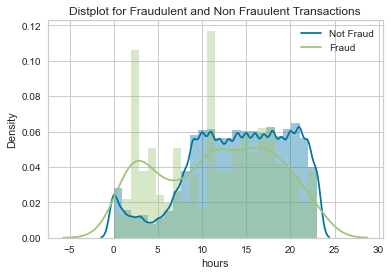

In [ ]:
sns.distplot(credit_df['hours'][credit_df.Class == 0], bins =24)
sns.distplot(credit_df['hours'][credit_df.Class == 1], bins =24)
plt.legend(['Not Fraud','Fraud'])
plt.title('Distplot for Fraudulent and Non Frauulent Transactions');

Plot shows that there the Fraudulent transactions between 0 and 5 are very high, while the Normal Ftransactions are low.

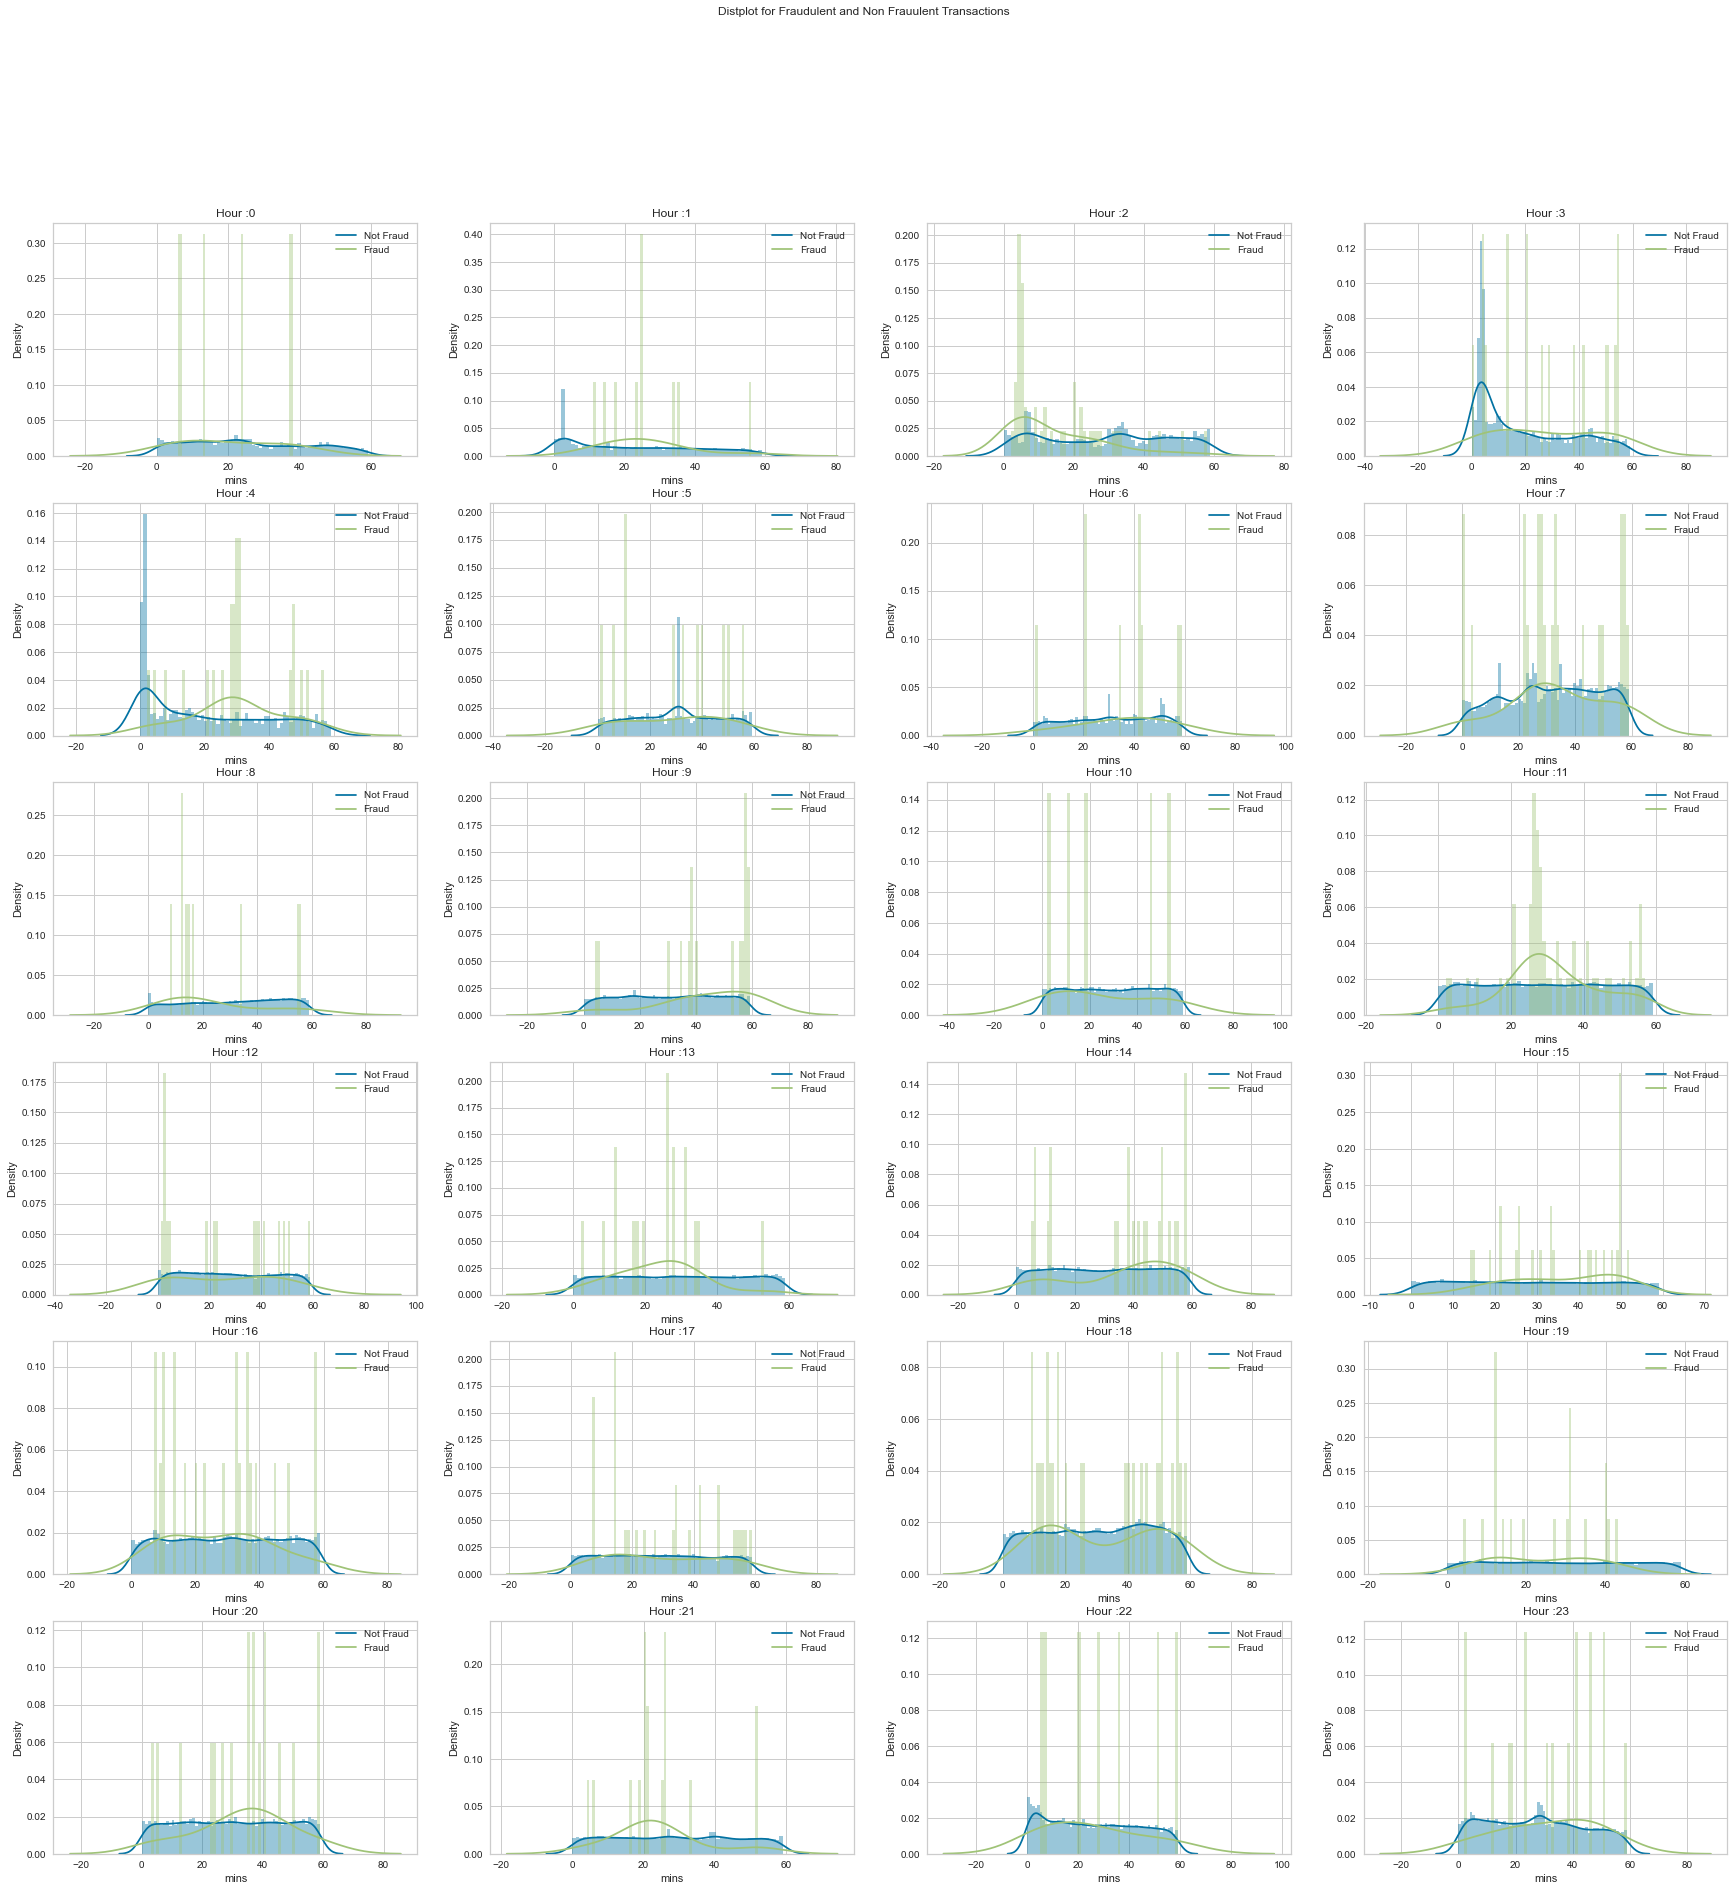

In [ ]:
ig, ax= plt.subplots(nrows=6, ncols=4,figsize=(30, 30))
i=0
j=0
for name,group in credit_df.groupby("hours"):
  sns.distplot(group['mins'][group.Class == 0], bins =60,ax=ax[i][j])
  sns.distplot(group['mins'][group.Class == 1], bins =60,ax=ax[i][j])
  ax[i][j].set_title("Hour :"+str(name))
  ax[i][j].legend(['Not Fraud','Fraud'])
  if(j == 3 and i <= 5):
    i += 1
    j = 0
  else:
    j += 1
title = "Distplot for Fraudulent and Non Frauulent Transactions"
plt.suptitle(title);

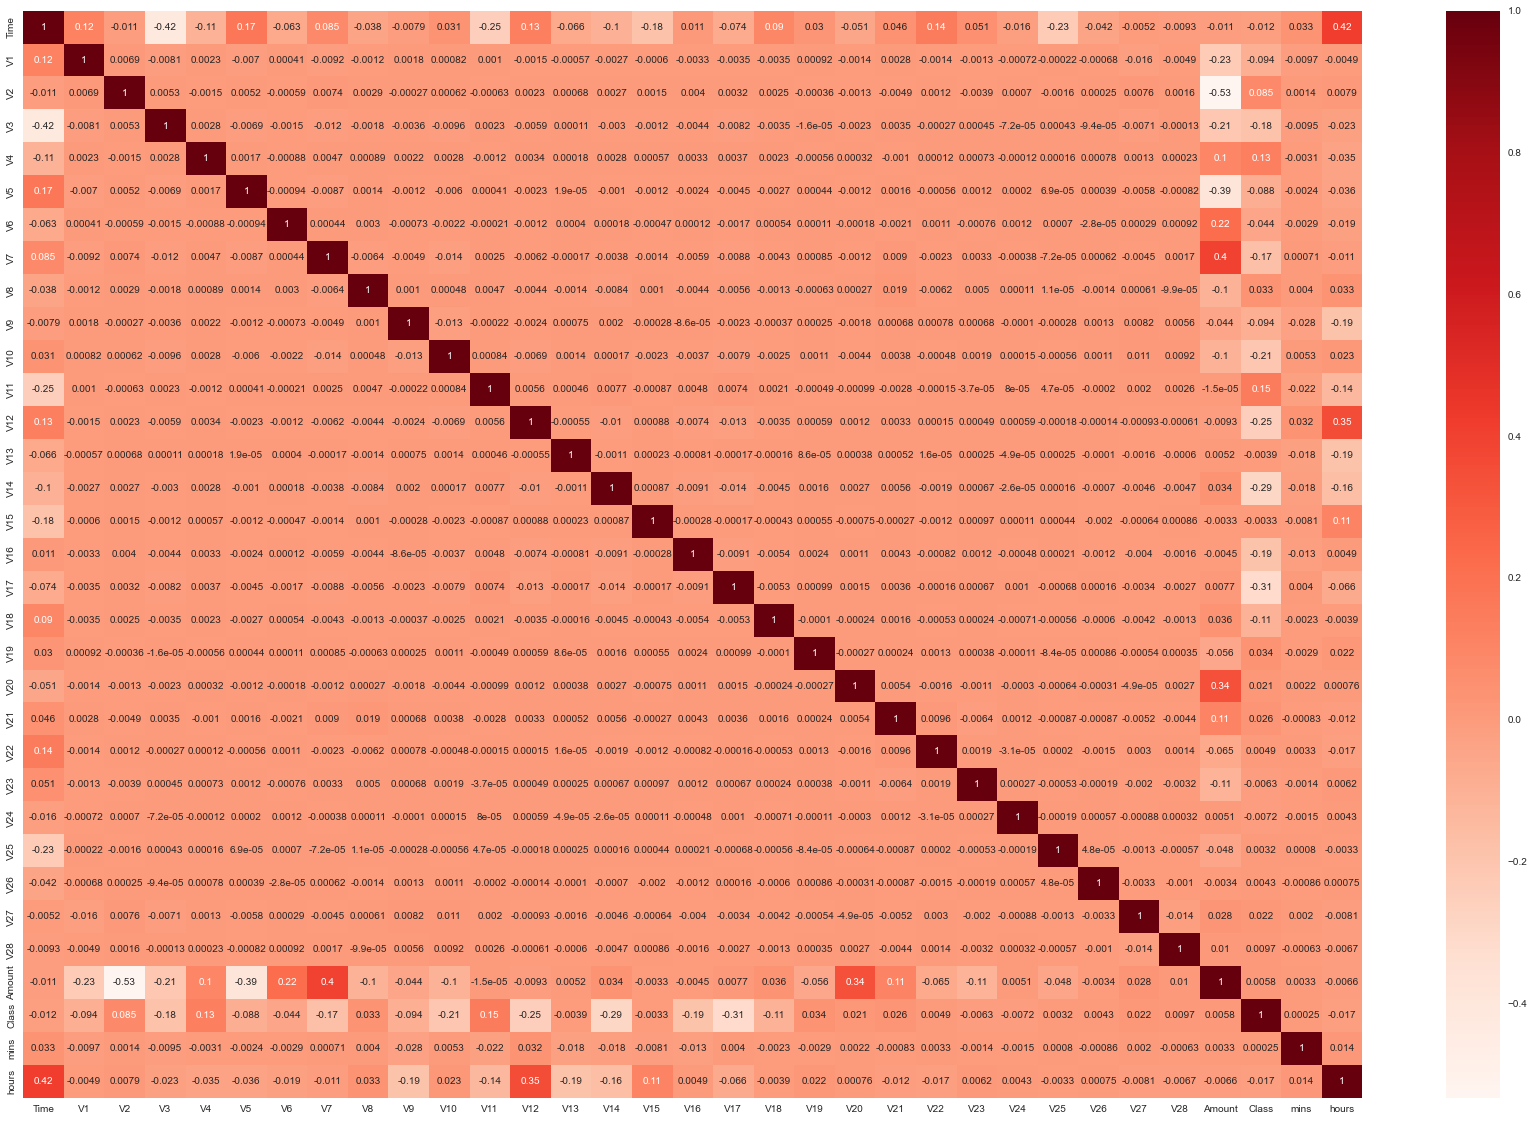

In [ ]:
plt.figure(figsize=(30,20))
cor = credit_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

From the Correlation matrix above V17, V14, V12 and
V10 are negatively correlated to the response variable and
V2, V4, V11, and V19 are positively correlated.

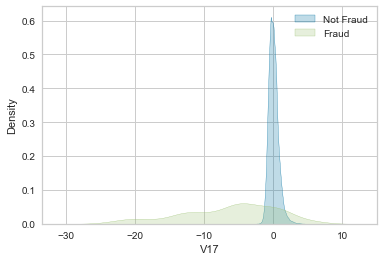

In [ ]:
sns.kdeplot(data=credit_df[credit_df['Class'] == 0]['V17'], label="Not Fraud", 
            shade=True)
sns.kdeplot(data=credit_df[credit_df['Class'] == 1]['V17'], label="Fraud", 
            shade=True)
plt.legend();

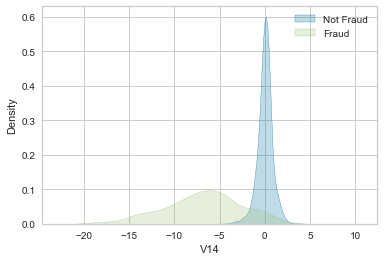

In [ ]:
sns.kdeplot(data=credit_df[credit_df['Class'] == 0]['V14'], label="Not Fraud", 
            shade=True)
sns.kdeplot(data=credit_df[credit_df['Class'] == 1]['V14'], label="Fraud", 
            shade=True)
plt.legend();

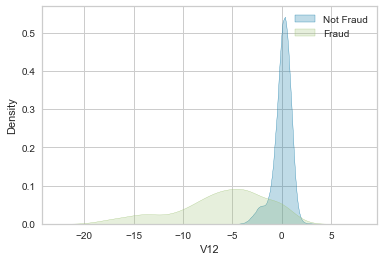

In [ ]:
sns.kdeplot(data=credit_df[credit_df['Class'] == 0]['V12'], label="Not Fraud", 
            shade=True)
sns.kdeplot(data=credit_df[credit_df['Class'] == 1]['V12'], label="Fraud", 
            shade=True)
plt.legend();

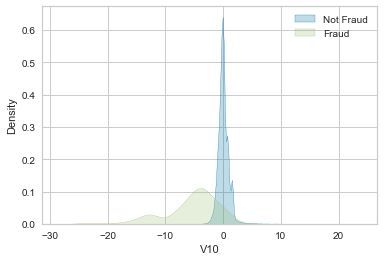

In [ ]:
sns.kdeplot(data=credit_df[credit_df['Class'] == 0]['V10'], label="Not Fraud", 
            shade=True)
sns.kdeplot(data=credit_df[credit_df['Class'] == 1]['V10'], label="Fraud", 
            shade=True)
plt.legend();

These plots indicate a clear distinction between fraud and
Normal transaction. These variables might have an important role in predicting the Spam Transactions.

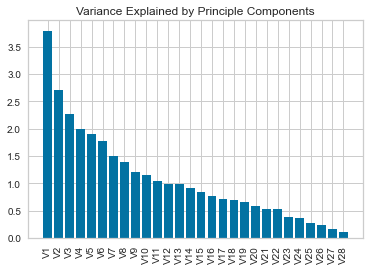

In [ ]:
var=np.cov(credit_df[['V'+str(i) for i in range(1,29)]].T)
explained_var=var.diagonal()
plt.bar(['V'+str(i) for i in range(1,29)],explained_var)
plt.xticks(rotation = 90)
plt.title("Variance Explained by Principle Components");

V1 and V2 might be PC1 and PC2 axis which is the principal direction along which the samples show the largest variation. Variance explained ratio cannot be calculated without knowing the actual Feature values

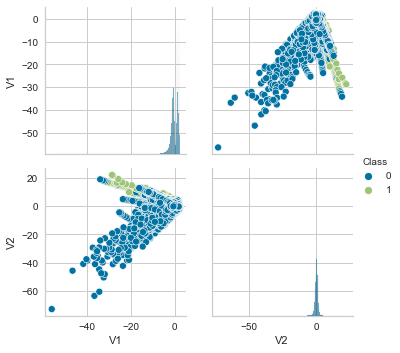

In [ ]:
g = sns.PairGrid(credit_df,vars=["V1","V2"], hue="Class")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend();